<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/OpenCV/3-4-Perspective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from skimage import io
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1IcBrgcx8NP85gYg5XrhPhr12GgGDPweu' -O elephant2.png

In [3]:
# image = color.rgb2gray(data.astronaut())
img = io.imread('elephant2.png')
image = color.rgb2gray(img[:,:,:3])

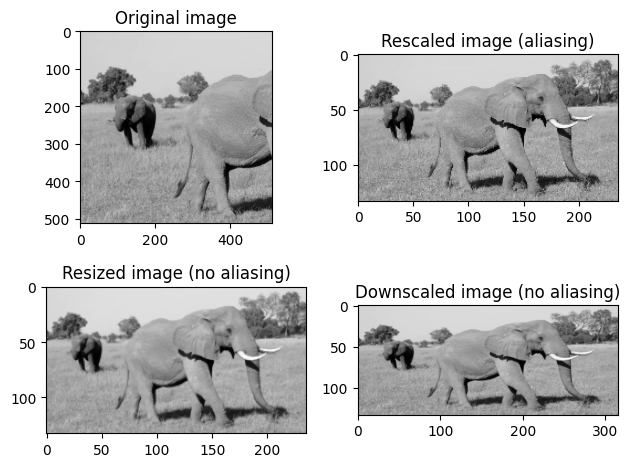

In [4]:


image_rescaled = rescale(image, 0.25, anti_aliasing=False)
image_resized = resize(
    image, (image.shape[0] // 4, image.shape[1] // 4), anti_aliasing=True
)
image_downscaled = downscale_local_mean(image, (4, 3))

fig, axes = plt.subplots(nrows=2, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

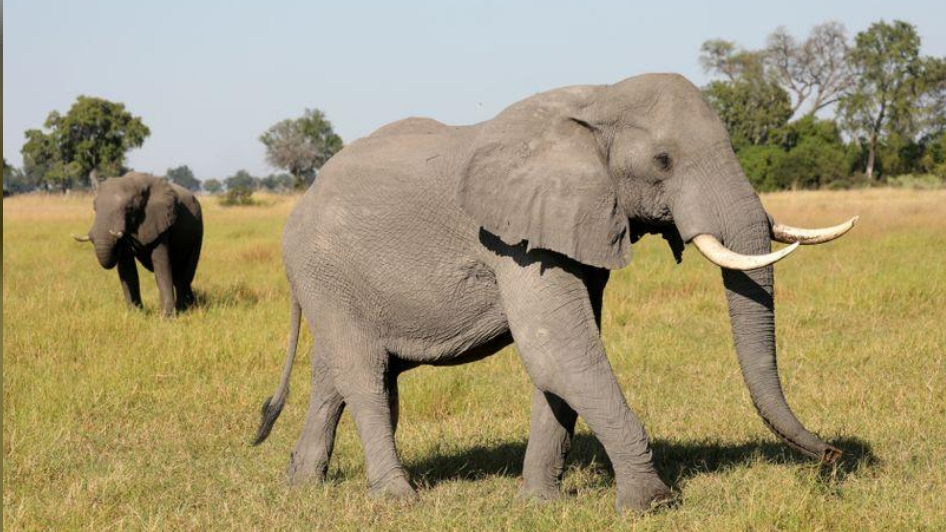

In [15]:
# 원본 이미지 읽기
img = cv2.imread('elephant2.png')

# 원본 이미지의 4개 좌표
src_points = np.float32([[100, 100], [200, 100], [100, 200], [200, 200]])

cv2_imshow(img)

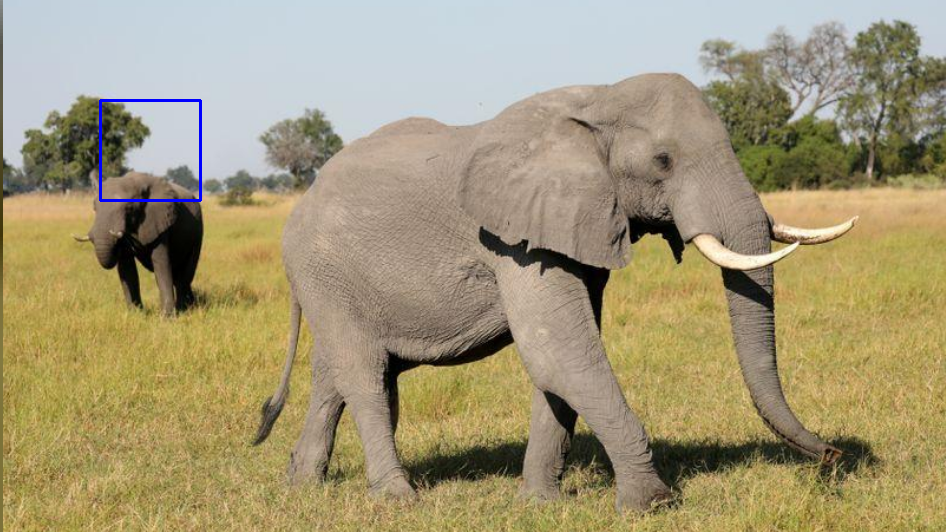

In [17]:
image = cv2.imread('elephant2.png')

# 사각형의 좌표 (시작점: [100, 100], 끝점: [200, 200])
start_point = (100, 100)
end_point = (200, 200)

# 사각형 그리기 (파란색, 두께 2)
cv2.rectangle(image, start_point, end_point, (255, 0, 0), 2)

# 이미지 창 열기
cv2_imshow(image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


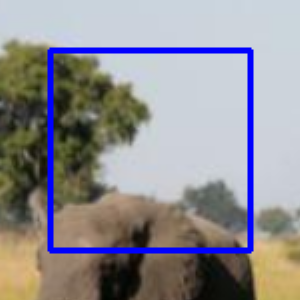

In [18]:


# 변환 후의 4개 좌표 (원하는 대로 설정)
dst_points = np.float32([[50, 50], [250, 50], [50, 250], [250, 250]])

# 원근 변환 행렬 계산
M = cv2.getPerspectiveTransform(src_points, dst_points)

# 원근 변환 적용
output = cv2.warpPerspective(img, M, (300, 300))

# 결과 이미지 표시
# cv2.imshow('Perspective Transformation', output)
cv2_imshow(output)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
